In [ ]:
# http://lottoscar.altervista.org/archivi.html
# https://www.simplifiedpython.net/python-download-file/#Download_Zip_File 
# https://living-sun.com/it/python/705402-how-can-i-extract-a-closed-zip-with-python-python-zipfile.html


In [48]:
# importazione delle librerie
import requests
import zipfile
import csv
import pandas as pd
import numpy as np
import funzioni as fn
from pprint import pprint
from itertools import combinations, permutations


CLASSI

In [78]:
class Numero:

    def __init__(self, n, nome_file_ruota):

        self.precedente_ritardo = 0                     # l'ultimo ritardo conosciuto
        self.frequenze = []
        self.frequenza_attuale = 0
        self.numero = n                                 # deve essere un vettore di massimo 5 numeri
        self.dataset = fn.leggi_da_csv(nome_file_ruota) # è il dataframe di ricerca informazioni             
        self.ruota = self.dataset[1][1]
        self.ritardi = []
        self.scompensi = []
        self.scomp = 0
        self.uscite_totali = 0
        

    def info(self):
        # impostazione del vettore che memorizza il numero della estrazione in cui esce, e serve per tutti i calcoli successivi
        temp = []
        #print(self.dataset[0][2:])
        tipo = len(self.numero)
        if tipo == 1:
            for i in range(len(self.dataset)):
                #print(self.dataset[i][2:])
                if str(self.numero[0]) in self.dataset[i][2:]:
                    temp.append(i+1)
        elif tipo > 1:
            # definisce l'ambo, il terno, la quaterna o la cinquina da cercare
            temp_n = []
            for i in self.numero:
                temp_n.append(str(i))
            temp_n = tuple(temp_n)
            #print(temp_n)

            for i in range(len(self.dataset)):
                comb = list(permutations(self.dataset[i][2:], tipo))
                #print(comb)
                
                if temp_n in comb:
                    temp.append(i+1)
            #print(temp)
            
        if len(temp) == 0:
            self.precedente_ritardo = len(self.dataset) + 1
            self.ultimo_ritardo = len(self.dataset) + 1
            self.ritardo_max = len(self.dataset) + 1
            self.frequenza_attuale = 0
            self.previsione = np.NaN
            self.scomp = np.NaN
            
        elif len(temp) == 1: 
            self.precedente_ritardo = 0
            self.ultimo_ritardo = temp[0]
            self.uscite_totali = len(temp)

            # calcolo delle scompensazioni
            for i in range(1, len(temp)):
                r = temp[i] - temp[i-1]                 # Ritardo del numero nel momento in cui è uscito
                self.ritardi.append(r)                  # archivio dei ritardi
                n_estr = temp[i]                        # numero della estrazione del numero nel momento in cui è uscito
                freq = int(n_estr / len(temp[:i]))      # frequenza nel momento in cui è uscito
                self.frequenze.append(freq)
                self.scomp += (r - freq)                # scompensazione nel momento in cui è uscito
                self.scompensi.append(self.scomp)

            self.ritardo_max = temp[0]
            self.frequenza_attuale = int((len(self.dataset)+1)/(len(temp)))
            self.previsione = self.frequenza_attuale - self.ultimo_ritardo

        else:
            self.precedente_ritardo = temp[len(temp)-1] - temp[len(temp)-2] # Rutaro precedente all'ultima uscita
            self.ultimo_ritardo = len(self.dataset) - temp[len(temp)-1]     # ritardo all'ultima uscita
            self.uscite_totali = len(temp)
            
            # calcolo delle scompensazioni
            for i in range(1, len(temp)):
                r = temp[i] - temp[i-1]                 # Ritardo del numero nel momento in cui è uscito
                self.ritardi.append(r)                  # archivio dei ritardi
                n_estr = temp[i]                        # numero della estrazione del numero nel momento in cui è uscito
                freq = int(n_estr / len(temp[:i]))      # frequenza nel momento in cui è uscito
                self.frequenze.append(freq)
                self.scomp += (r - freq)                # scompensazione nel momento in cui è uscito
                self.scompensi.append(self.scomp)

            self.ritardo_max = max(self.ritardi)                        # massimo ritardo fatto dal numero
            self.frequenza_attuale = int((len(self.dataset)+1)/(len(temp)))   # frequenza attuale
            self.previsione = self.frequenza_attuale - self.ultimo_ritardo      # previsione di uscita calcolata sulla frequenza e il ritardo attiale

    def mostra_info(self):

        #valori = {
        #    "Numero" :             self.numero,
        #    "Ruota" :              self.ruota,
        #    "N. uscite" :           self.uscite_totali
        #    "Ritardo Precedente" : self.precedente_ritardo,
        #    "Ritardo Attuale" :    self.ultimo_ritardo,
        #    "Ritardo Massimo" :    self.ritardo_max,
        #    "Frequenza" :          self.frequenza_attuale,
        #    "Previsione" :         self.previsione,
        #    "Scompensazione":      self.scomp
        #}

        valori = [
            self.numero,
            self.ruota,
            self.uscite_totali,
            self.precedente_ritardo,
            self.ultimo_ritardo,
            self.ritardo_max,
            self.frequenza_attuale,
            self.previsione,
            self.scomp
            ]
    
        return valori
    
    def print_info(self):

        print(
            "\n","Numero", self.numero,
            "\n","Ruota", self.ruota,
            "\n","N. uscite", self.uscite_totali,
            "\n","Ritardo Precedente", self.precedente_ritardo,
            "\n","Ritardo Attuale", self.ultimo_ritardo,
            "\n","Ritardo Massimo", self.ritardo_max,
            "\n","Frequenza", self.frequenza_attuale,
            "\n","Previsione", self.previsione,
            "\n","Scompensazione", self.scomp
        )



FUNZIONI

In [70]:
# Funzione per scaricare il database dei numeri
def update_archivio():
    # download archivio
    url = "http://lottoscar.altervista.org/ArchivioLotto.italia.zip"
    r = requests.get(url)
    with open("ArchivioLotto.italia.zip", "wb") as zip:
        zip.write(r.content)

    # estrazione del file zip
    f = zipfile.ZipFile("ArchivioLotto.italia.zip")
    f.extractall()
    # elaborazione delle singole ruote dal file generale
    fn.estrai_ruote('ArchivioLotto.italia.csv')


In [5]:
# Funzione per creare il dataset dei numeri in formato oggetto e richiamabili
def dataset_numeri(data):
    numeri = []
    for n in range(1, 91):
        t = Numero([n], data)
        numeri.append([n, t])
    
    return numeri

In [72]:
# Funzione per creare una tabella con tutte le statistiche di ogni numero
def print_numeri(data):
    numeri = []
    for n in range(1, 91):
        t = Numero([n], data)
        t.info()
        numeri.append(t.mostra_info())
    
    return numeri


In [73]:
# Funzione per creare una tabella con tutte le statistiche di ogni numero come un database pandas
def print_dataframe_from_numeri(data):
    numeri = print_numeri(data)
    df = pd.DataFrame(numeri, columns=[
                                        "Numero", 
                                        "Ruota", 
                                        "N. Uscite",
                                        "Ritardo Precedente",
                                        "Ritardo Attuale",
                                        "Ritardo Massimo", 
                                        "Frequenza", 
                                        "Previsione",
                                        "Scompensazione"
                                        ]
                    ).set_index(
                                [
                                    "Numero", 
                                    "Ruota"
                                ]
                            )

    return df

CODICE

In [71]:
update_archivio()

In [76]:
numeri = []
for i in range(1, 91):
    numeri.append(i)

temp = Numero([40, 38], "MI.csv")
temp.info()
#print(temp.uscite_totali)
temp.print_info()
temp.mostra_info()
#print(numeri)

comb = list(combinations(numeri, 4))
print(len(comb))

for i in comb:
    temp = Numero(i, "MI.csv")
    temp.info()
    

    if temp.uscite_totali > 0:
        print(i, temp.uscite_totali)



 Numero [40, 38] 
 Ruota MI 
 N. uscite 22 
 Ritardo Precedente 69 
 Ritardo Attuale 92 
 Ritardo Massimo 1133 
 Frequenza 300 
 Previsione 208 
 Scompensazione -898
2555190
(1, 2, 3, 4) 1
(1, 2, 3, 5) 1
(1, 2, 4, 5) 1
(1, 2, 9, 38) 1
(1, 2, 9, 67) 1
(1, 2, 12, 23) 1
(1, 2, 12, 57) 1
(1, 2, 14, 19) 1
(1, 2, 14, 72) 1


KeyboardInterrupt: 

In [36]:
import pandas_ta as ta
import matplotlib.pyplot as plt

df = pd.DataFrame()

temp = Numero([32, 34], "MI.csv")
#print(temp.scompensi)
temp.info()
temp.print_info()
#print(temp.ritardi)
n = str("close")
if temp.uscite_totali > 0:
    df[n] = temp.scompensi
    sma10 = df.ta.sma(length=3)
    sma30 = df.ta.sma(length=5)
    df = pd.concat([df[n], sma10, sma30], axis=1)
    df['scomp_sigLine'] = np.where(df['SMA_3'] > df['SMA_5'], 1, 0 )
    df["Status"] = np.where(df['scomp_sigLine'] == 0, "Uscita", "Ritardo" )

    qf = pd.DataFrame()
    qf["Ritardi"] = temp.ritardi


    pf = pd.concat([df, qf], axis=1)


    pf["Frequenze"] = temp.frequenze
    pf.to_csv("stats.csv")
else:
    print(f"{temp.numero} non è mai uscito")



 Numero [32, 34] 
 Ruota MI 
 N. uscite 11 
 Ritardo Precedente 632 
 Ritardo Attuale 18 
 Ritardo Massimo 2000 
 Frequenza 600 
 Previsione 582 
 Scompensazione -4728


In [14]:
help(ta.sma)

Help on function sma in module pandas_ta.overlap.sma:

sma(close, length=None, talib=None, offset=None, **kwargs)
    Simple Moving Average (SMA)
    
    The Simple Moving Average is the classic moving average that is the equally
    weighted average over n periods.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/simple-moving-average-sma/
    
    Calculation:
        Default Inputs:
            length=10
        SMA = SUM(close, length) / length
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 10
        talib (bool): If TA Lib is installed and talib is True, Returns the TA Lib
            version. Default: True
        offset (int): How many periods to offset the result. Default: 0
    
    Kwargs:
        adjust (bool): Default: True
        presma (bool, optional): If True, uses SMA for initial value.
        fillna (value, optional): pd.DataFrame.fillna(value)
     

In [24]:
def plot_graph(df):

    df=df.astype(float)
    plt.rcParams["figure.figsize"] = (36, 30)
    #plt.rcParams["savefig.format"] = 'png'  

    # plotting di tutte le curve 
    plt.plot(pf['close'][-50:], color='blue', label='ritardo')
    plt.plot(pf["SMA_3"][-50:], color='red', label='SMA_3')
    plt.plot(pf["SMA_5"][-50:], color='green', label='SMA_5')

    # configuraione degli assi
    plt.xlabel('Numero uscita',fontsize=18)
    plt.ylabel('Riardo',fontsize=18)

    # plot signals EMA_RSI_ATR
    #plt.plot(df.index, df['BuyEMA_RSI_ATR'], '^', markersize = 15, color = 'purple', label='BuyEMA_RSI_ATR') # plot ‘Buy’ signals
    #plt.plot(df.index, df['SellEMA_RSI_ATR'], 'v', markersize = 15, color = 'black', label='SellEMA_RSI_ATR') # plot ‘Sell’ signals

    # configurazioni del titolo, leggende, griglia
    plt.title('GRAFICO', fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()

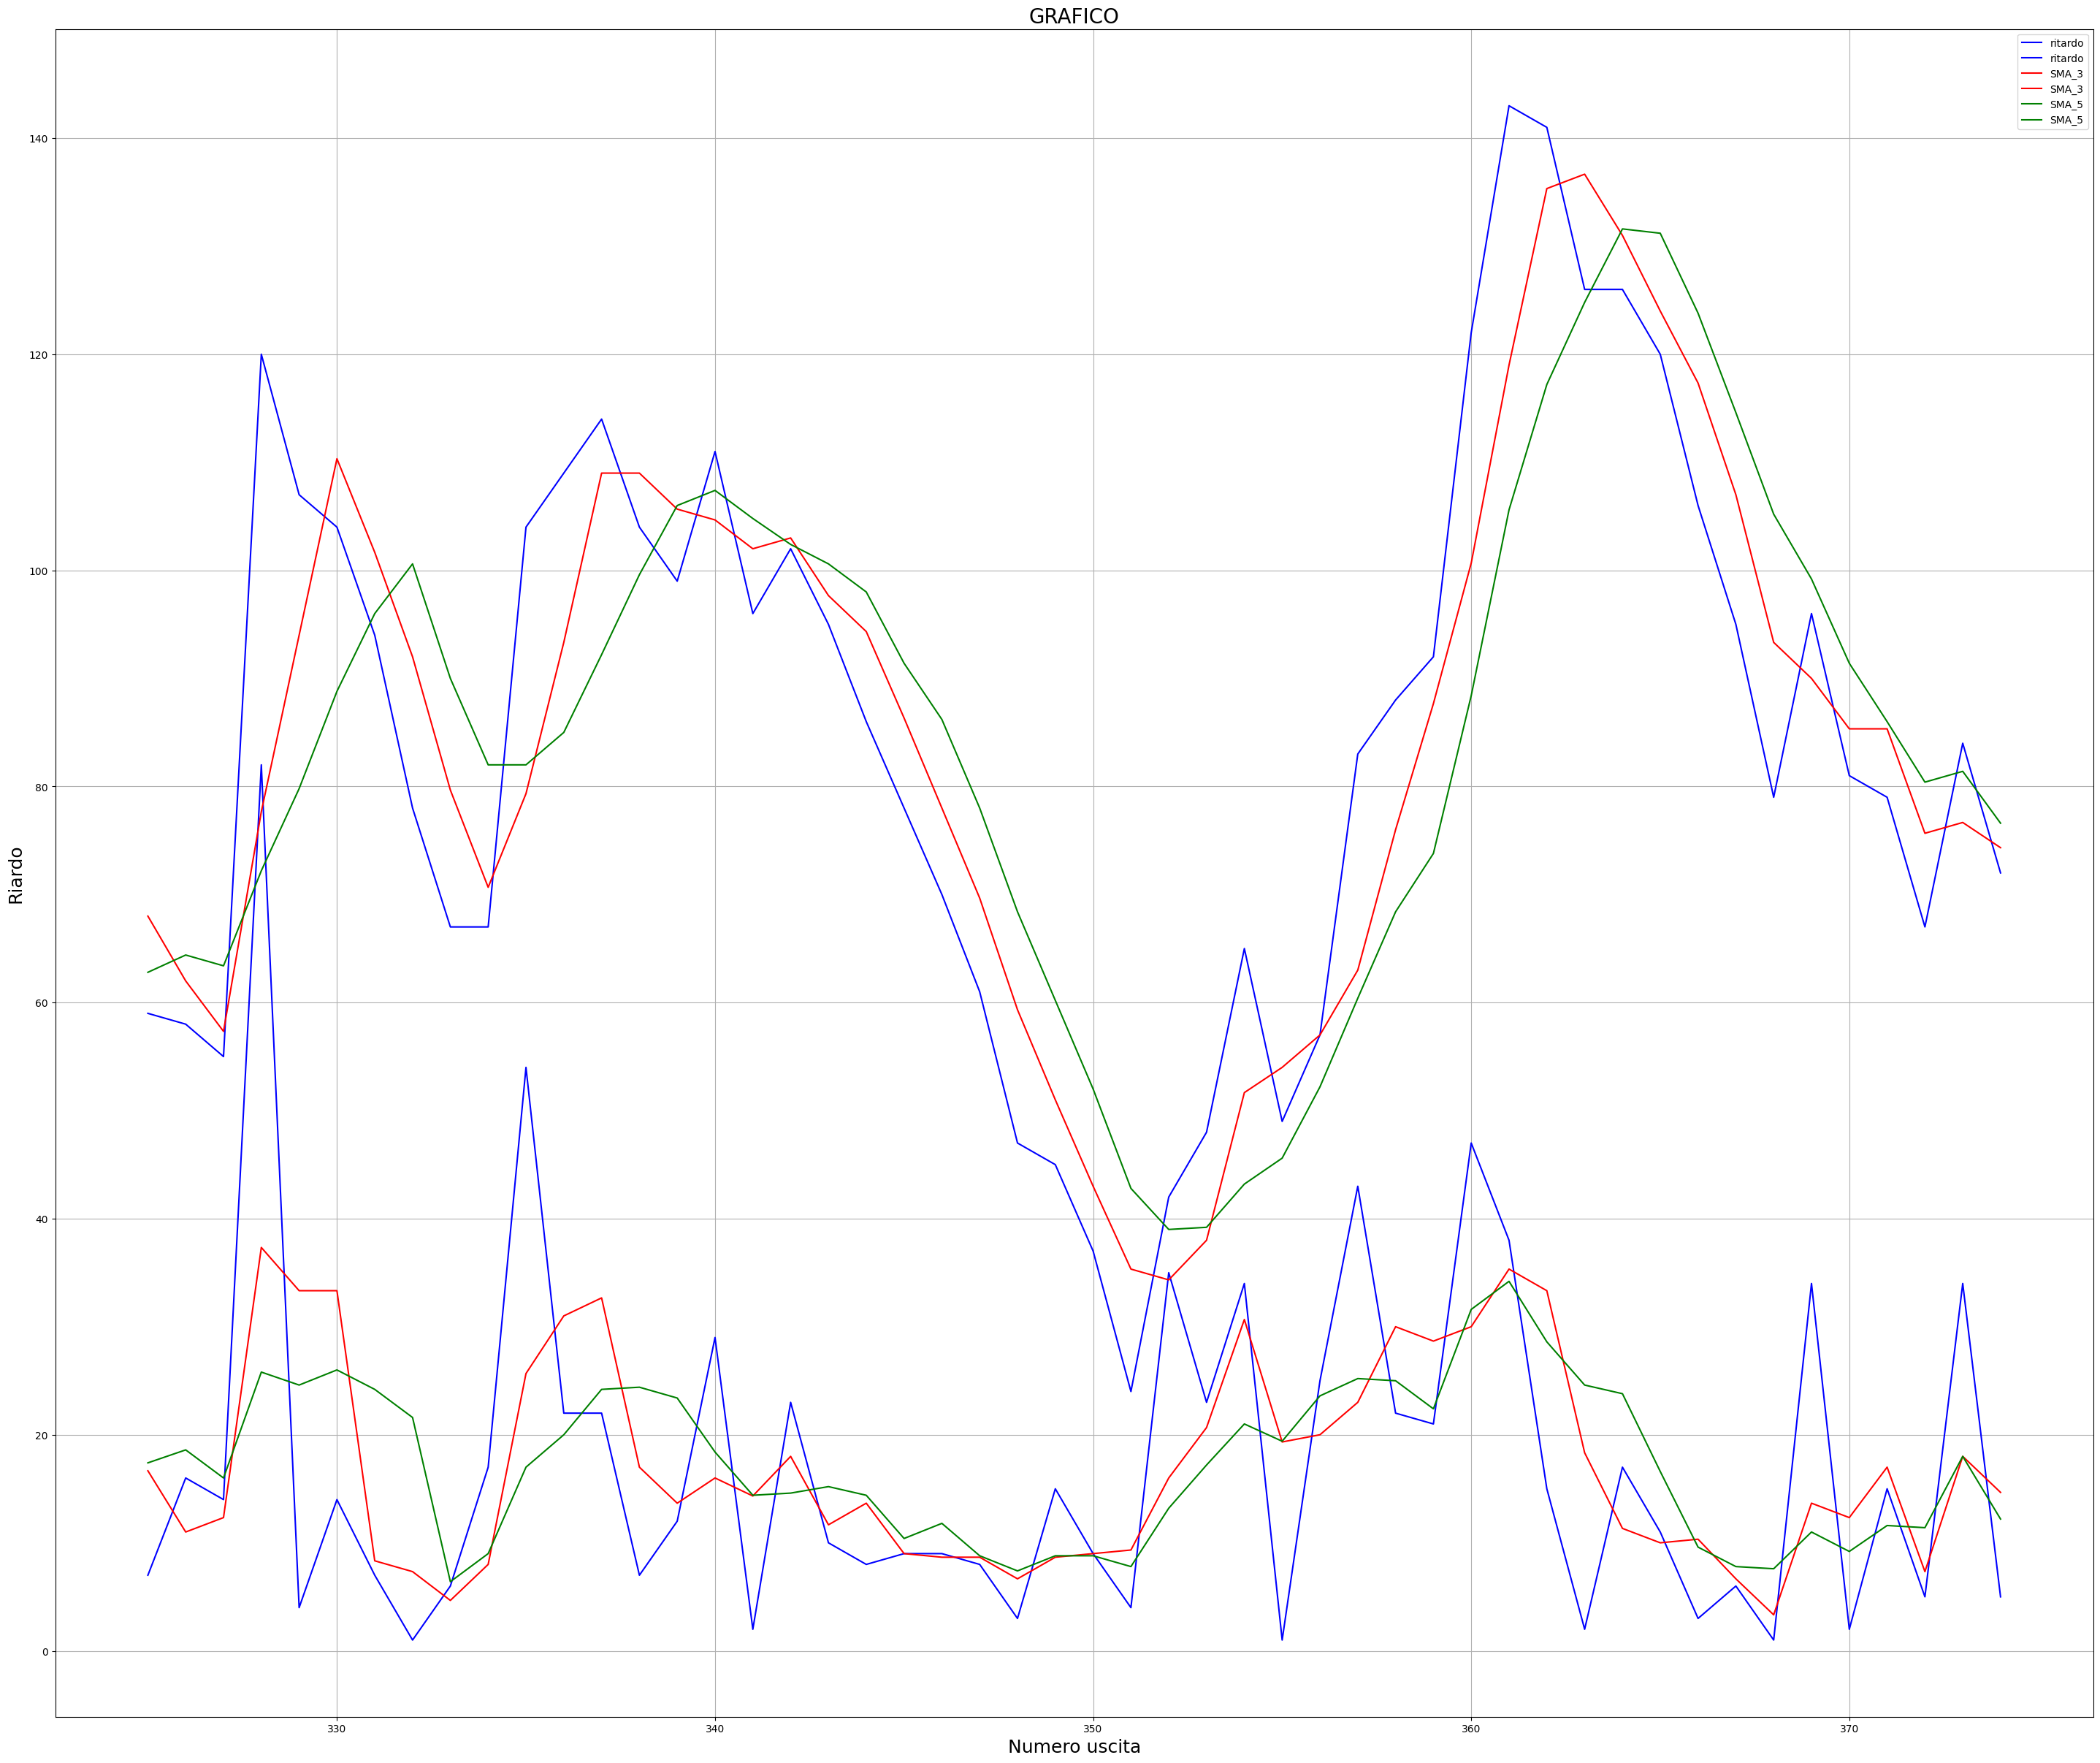

In [26]:
plot_graph(df)